In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'C:\\Users\\Nandini Dulam\\OneDrive\\WebScraping'

In [5]:
# Load dataset

df = pd.read_excel("Predicition.xlsx")

# Exploratory Data Analysis


In [15]:
print(df.head())
print("Columns:----"+df.columns)
print("shape:----" +str(df.shape))

# Get statistical summary of the numerical columns

print("Description:----" +str(df.describe().T))

# Check for missing values in the dataset

print("Null:----" +str(df.isnull().values.any()))
print("Sum of Null:----" +str(df.isnull().sum()))


   Year Month Sales Group     Sales Staff  \
0  2021   Jan         LMG  SHIBLU/IBRAHIM   
1  2021   Jan         LMG  SHIBLU/IBRAHIM   
2  2021   Jan         LMG            SAMI   
3  2021   Jan         LMG            SAMI   
4  2021   Jan         LMG            SAMI   

                             Supplier Name         Customer Name  \
0  National Eastern Import & Export Co WLL         Ahmad Mohamed   
1  National Eastern Import & Export Co WLL         Ahmad Mohamed   
2         Cantrust Universal Trade Limited  AL Ibdaa Motors FZCO   
3         Cantrust Universal Trade Limited  AL Ibdaa Motors FZCO   
4            Ghassan Aboud Car Trading LTD      Baniyas Cars Est   

     Customer Type       Model Group   Brand              Model Segment  ...  \
0           Broker         Prado 2.7  TOYOTA            SUV - Passenger  ...   
1           Broker         Prado 2.7  TOYOTA            SUV - Passenger  ...   
2  Showroom/Dealer            Tundra  TOYOTA  Pickup Truck - Passsenger  ...   


In [43]:
pd.unique(df.values.ravel())

array([2021, 'Jan', 'LMG', ..., 63440.0, 6560.0, 0.09371428571428571],
      dtype=object)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U28'), dtype('float64')) -> None

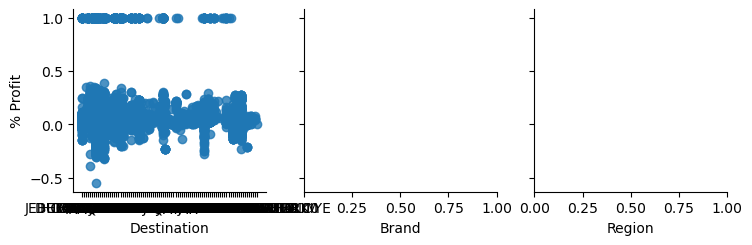

In [25]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df, x_vars=["Destination", "Brand", "Region"], y_vars="% Profit", kind="reg")

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Qty'}>,
        <Axes: title={'center': 'Sales Price'}>],
       [<Axes: title={'center': 'Cost Price'}>,
        <Axes: title={'center': 'Total Cost'}>,
        <Axes: title={'center': 'Profit Amount'}>],
       [<Axes: title={'center': '% Profit'}>, <Axes: >, <Axes: >]],
      dtype=object)

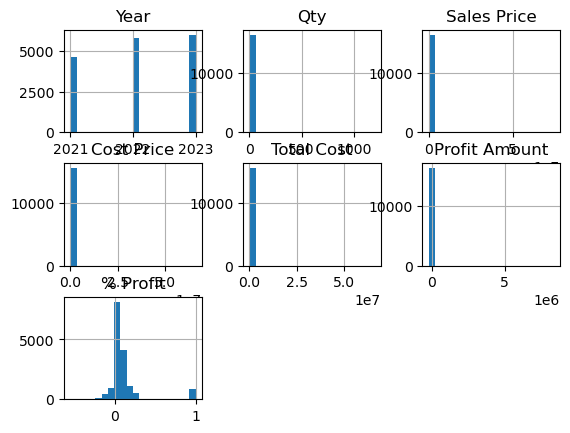

In [18]:
# Histograms to check the normality assumption of the dependent variable (Sales)

df.hist(bins=20)

ValueError: could not convert string to float: 'Jan'

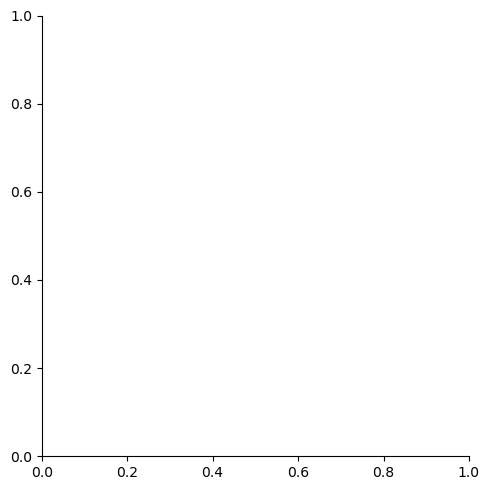

In [30]:


# Linear regression plots to visualize the relationship between each independent variable and the dependent variable

sns.lmplot(x='Month', y='Sales Price', data=df)
sns.lmplot(x='Month', y='% Profit', data=df)
sns.lmplot(x='Qty',y= 'Profit Amount', data=df)



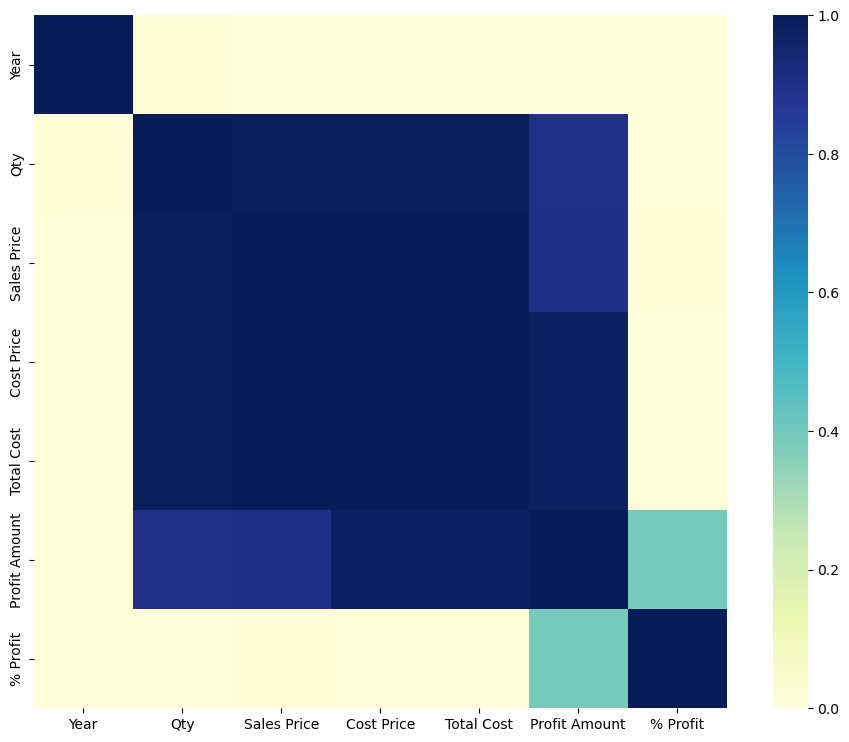

In [27]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

In [31]:
# Model Preparation

X = df.drop('Qty', axis=1)
y = df[["Qty"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [32]:
# Linear Regression Model

lin_model = sm.ols(formula="Qty ~ Region + Destination + Month", data=df).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:


# Print the coefficients of the linear model

print(lin_model.params, "\n")



In [ ]:
# Print the summary of the linear regression model

print(lin_model.summary())

In [ ]:
# Evaluate the model

results = []
names = []

In [ ]:


# Define a list of models to evaluate

models = [('LinearRegression', LinearRegression())]



In [ ]:
# Loop through each model, fit it to the data, and calculate the RMSE

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

In [ ]:


# Make predictions on new data

new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)



In [ ]:
# Make predictions on new data

new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)